Eleanor Alarcón Neri - A01665593

Emma Sofia Aparicio Rodriguez - A01666223


---
# **Challenge Work: Pediatric HIV**

---

Link to Emma's repo: [emma's github](https://github.com/emmasofiaar/arte_analitica)

Link to Ele's repo: [ele's github](https://github.com/aneleanor/Mastering_Analytics)





---


### **SMART Objectives**

**ELEANOR**

  
S (specific) To analyze the relative variability in estimated ART coverage among children living with HIV in the Americas and Europe by identifying key factors influencing data inconsistencies.

M (measurable) The relative variability being greater than 40%

A (achievable) It is achievable using statistics methods such as boxplots, kmeans, heat maps, etc.

R (relevant) This variable has not been analyzed in other research or the same database.

T (within a timeframe) This study will be completed this week, with findings presented in a final report.

**EMMA**

S (specific): To evaluate disparities in pediatric ART (antiretroviral therapy) coverage by grouping countries.

M (measurable): Show countries with less than 50% amount of coverage.

A (achievable): This objective is achievable using K-Means clustering and data visualization tools.

R (relevant): Observing these disparities in ART treatment will help us visualize where there are treatment gaps and potentially addressing them in the future. Additinally this disparity in ART treatment availability vs need has not been analyzed in the same dataset.

T (within a timeframe): The study will be completed this tec week.



---



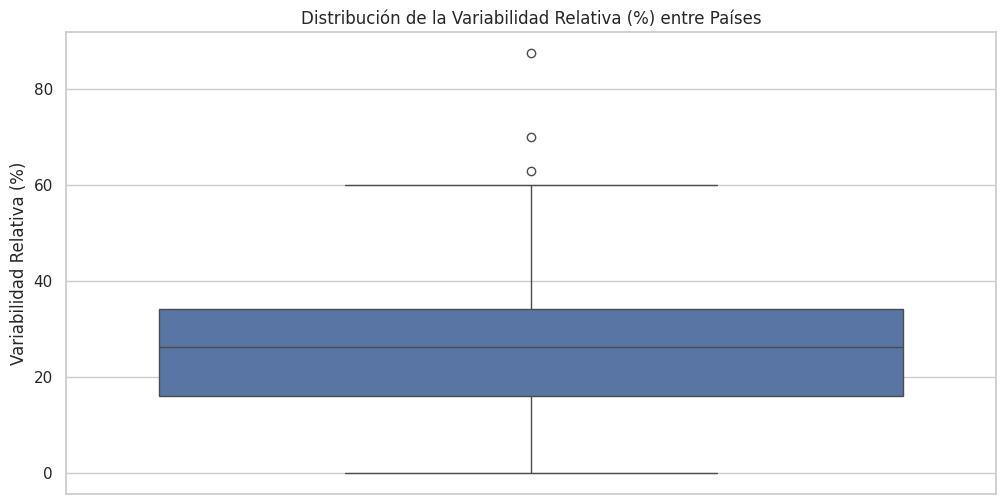

In [2]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Read the data
df = pd.read_csv("https://github.com/emmasofiaar/arte_analitica/raw/refs/heads/main/art_pediatric_coverage_by_country_clean.csv")
#We obtain de variability
df["Variabilidad_relativa"] = ((df["Estimated ART coverage among children (%)_median"] - df["Estimated ART coverage among children (%)_min"]) / df["Estimated ART coverage among children (%)_min"]) * 100
#Detele all null spaces
df_filtered = df.dropna(subset=["Variabilidad_relativa"])
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_filtered["Variabilidad_relativa"])
plt.title("Distribución de la Variabilidad Relativa (%) entre Países")
plt.ylabel("Variabilidad Relativa (%)")
plt.show()

2. Histogram

The histogram reveals how relative variability is distributed among the countries.
Most countries exhibit low relative variability, with a peak around 25-30%.
As variability increases, frequency decreases, indicating that few countries have highly uncertain estimates.

Some countries show extreme variability of around 80%, suggesting the issues in data collection or differences in estimation in the methodologie used

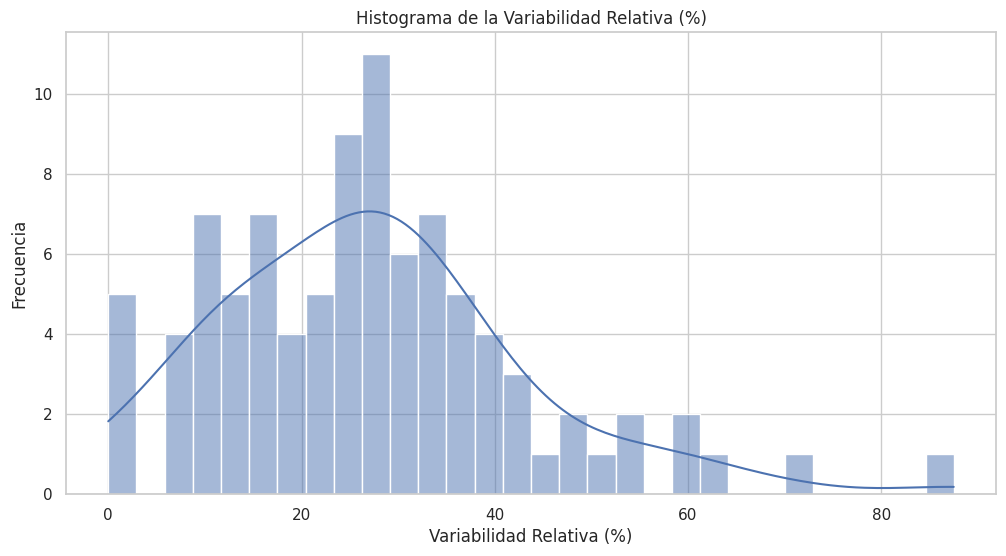

In [3]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered["Variabilidad_relativa"], bins=30, kde=True)
plt.title("Histograma de la Variabilidad Relativa (%)")
plt.xlabel("Variabilidad Relativa (%)")
plt.ylabel("Frecuencia")
plt.show()

3. Heat Map

This heatmap visually represents the correlation between three variables related to ART (Antiretroviral Therapy) coverage among children

There is a strong correlation (0.98) between Estimated ART coverage among children (%)_median and Estimated ART coverage among children (%)_min, indicating that minimum and medium estimates are closely related.


However, Relative Variability has a negative correlation (-0.48) with the minimum ART coverage, meaning that countries with higher ART coverage estimates tend to have more reliable data, while those with lower coverage show greater uncertainty. This suggests that data collection challenges or inconsistent reporting methods may contribute to variability in estimates, particularly in countries with limited healthcare infrastructure.

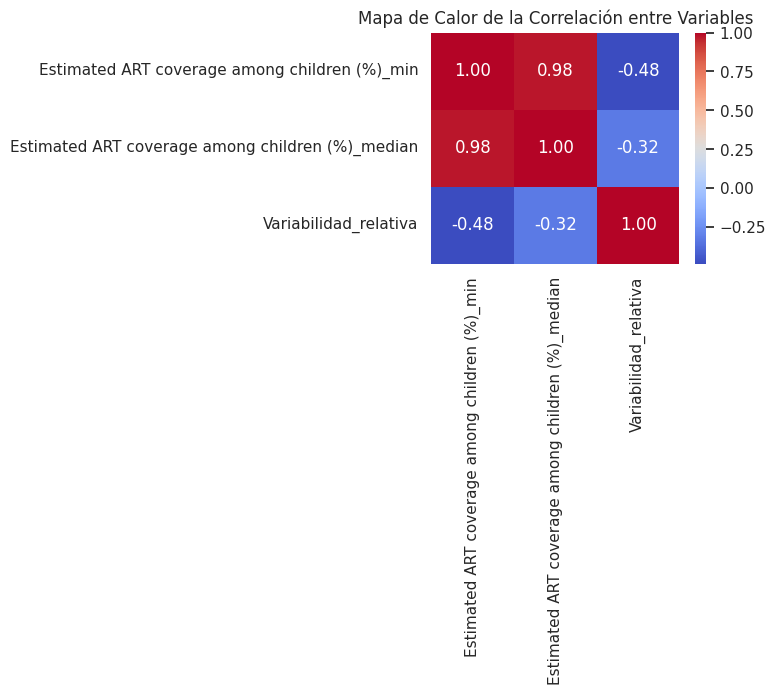

In [4]:
# Correlation
correlation_matrix = df_filtered[["Estimated ART coverage among children (%)_min", "Estimated ART coverage among children (%)_median", "Variabilidad_relativa"]].corr()
# Heat map
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()

## **Patterns using K-means**


Cluster centers:
   Reported number of children receiving ART  \
0                                    1936.60   
1                                   73244.44   
2                                    2918.71   

   Estimated number of children needing ART based on WHO methods_median  \
0                                            8053.40                      
1                                          119111.11                      
2                                            4048.06                      

   Estimated ART coverage among children (%)_median  
0                                             28.72  
1                                             62.89  
2                                             78.87  


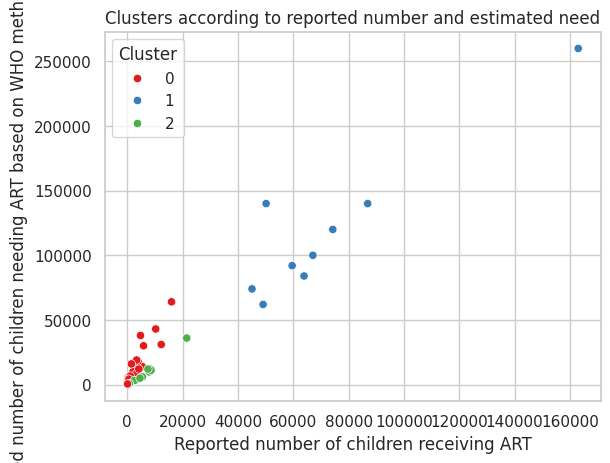

In [5]:
# we clean the data
df_clean = df.copy()
df_clean.replace("...", pd.NA, inplace=True)
df_clean.dropna(subset=[
    "Reported number of children receiving ART",
    "Estimated number of children needing ART based on WHO methods_median",
    "Estimated ART coverage among children (%)_median"
], inplace=True)

features = [
    "Reported number of children receiving ART",
    "Estimated number of children needing ART based on WHO methods_median",
    "Estimated ART coverage among children (%)_median"
]

for col in features:
    df_clean[col] = df_clean[col].astype(str).str.replace(" ", "").astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

# elbow method to determine k
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# asjust k-means based on elbow
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)

# centers of the clusters
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features)
print("\nCluster centers:")
print(centers_df.round(2))

# graph of the clusters
sns.scatterplot(data=df_clean, x=features[0], y=features[1], hue="Cluster", palette="Set1")
plt.title("Clusters according to reported number and estimated need")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()

In [8]:
# Cluster Summary by Countries
for cluster_id in sorted(df_clean["Cluster"].unique()):
    print(f"\nCluster {cluster_id}:")
    countries = df_clean[df_clean["Cluster"] == cluster_id]["Country"].tolist()
    for country in countries:
        print(f"- {country}")


Cluster 0:
- Afghanistan
- Angola
- Bahamas
- Bangladesh
- Belize
- Benin
- Bolivia (Plurinational State of)
- Botswana
- Burkina Faso
- Burundi
- Cameroon
- Central African Republic
- Chad
- Colombia
- Congo
- Côte d'Ivoire
- Cuba
- Democratic Republic of the Congo
- Djibouti
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Gambia
- Ghana
- Guatemala
- Guinea
- Guinea-Bissau
- Guyana
- Haiti
- Honduras
- Indonesia
- Jamaica
- Lao People's Democratic Republic
- Liberia
- Libya
- Madagascar
- Mali
- Mauritius
- Niger
- Pakistan
- Papua New Guinea
- Paraguay
- Peru
- Philippines
- Republic of Moldova
- Senegal
- Sierra Leone
- Somalia
- South Sudan
- Sudan
- Togo
- Yemen

Cluster 1:
- Kenya
- Malawi
- Mozambique
- Nigeria
- South Africa
- Uganda
- United Republic of Tanzania
- Zambia
- Zimbabwe

Cluster 2:
- Algeria
- Argentina
- Belarus
- Cambodia
- Chile
- Dominican Republic
- Ecuador
- Eswatini
- Ethiopia
- Gabon
- Iran (Islamic Republic of)
- Kazakhstan
- Kyrgyzstan
- Lesotho
-

### **Analysis of the K-means Clusters**

The K-Means algorithm grouped countries into three clusters based on:
* The reported number of children receiving ART
* The estimated number needing ART (WHO)
* The estimated ART coverage among children (%)

**Cluster 0 (Red) - Low ART coverage, high unmet need**
- These countries report low treatment numbers compared to high estimated need, resulting in low coverage.
- The countries in this cluster are mostly low- and middle-income countries across Africa, Asia, and Latin America.
- Low coverage percentages (29%).


**Cluster 1 (Blue)**:
- These countries have higher overall ART access with better—but not full—coverage.
- The countries are primarily from Eastern and Southern Africa.
- Moderate ART coverage (63%).


**Cluster 2 (Green)**:
- These countries are small-scale but efficient in meeting ART needs, with high coverage despite small numbers.
- A mix of middle-income countries in Europe, Latin America, and Asia.
- Higher ART coverage rates (79%).




**Why we used the algorithm:**

The K-means algorithm uncovers a hidden structure in the data, making it easier to compare and analyze countries based on how well they meet ART needs in children. K-means helped us categorize countries not just by raw numbers, but by proportional performance.



5. Data Mining
This parts removes the spaces between the words

In [ ]:
import re

def clean_spaces(s):
    if pd.isna(s):
        return ""
    s = re.sub(r"\s+", "", s)
    return s.strip()


df["WHO Region_clean"] = df["WHO Region"].apply(clean_spaces)



6. Word Cloud

This word cloud visually represents the frequency and prominence of different geographical regions related to ART (Antiretroviral Therapy) coverage. The larger words indicate terms that appear more frequently in the dataset, while smaller words are less common.

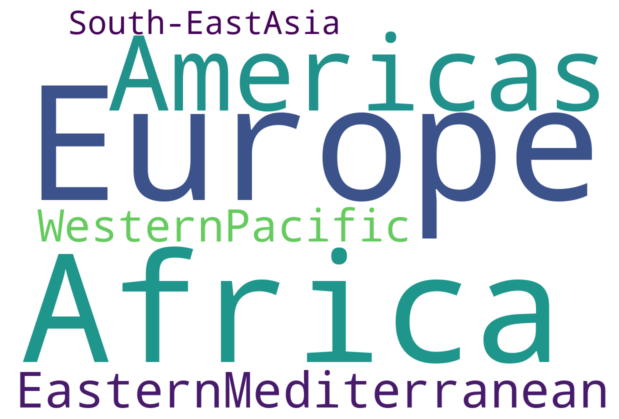

In [ ]:
import pandas as pd
from wordcloud import WordCloud
from collections import Counter

sub_df = df[['WHO Region_clean']]
def my_tokenizer(text):
  return text.split() if text != None else[]

tokens = sub_df['WHO Region_clean'].map(my_tokenizer).sum()

counter= Counter(tokens)
counter.most_common(10)

def wordcloud(counter):
    """A small wordcloud wrapper"""
    wc = WordCloud(width=1200, height=800,
                   background_color="white",
                   max_words=200)
    wc.generate_from_frequencies(counter)

    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

wordcloud(counter)



---


## **Conclusions**

**ELEANOR**

The boxplot shows that the relative variability in the Americas tends to be around 70-80%, which indicates it is an extreme variability. In the histogram we can also observe that most european countries stay in the range of low relative variability being 20-25%.
In the heat map there is a strong correlation (0.98) between Estimated ART coverage among children (%)_median and Estimated ART coverage among children (%)_min, indicating that minimum and medium estimates are closely related.

However, Relative Variability has a negative correlation (-0.48) with the minimum ART coverage, meaning that countries with higher ART coverage estimates tend to have more reliable data, while those with lower coverage show greater uncertainty

We can see that the data provided is not enough to get a strong conclusion for the reason behind it. However based on my personal opinion and research i can say that the problem may be where this data is being collected from or the differences in estimation in the methodologies used since the relative variabilty in europe tends to be around 20-25% while in Americas is 4x this.

**EMMA**

Using K-Means clustering, we were able to see that countries were grouped based on reported pediatric ART coverage, need, and estimated coverage percentage. From this method three clusters emerged, one cluster, comprised of mostly low- and middle-income countries, showed ART coverage levels below 50%, highlighting a disparity between treatment need and availability. This confirms that measurable differences exist across regions, and that data segmentation methods such as K-Means are effective in identifying these coverage gaps.


---


